# EDA

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Transactions Data Set

In [16]:
df = pd.read_csv('data/HI-Small_Trans_adjusted.csv')

def rename_columns(df):
    new_cols = {}
    for col in df.columns:
        new_col = col.lower().replace(' ', '_')
        new_cols[col] = new_col
    return df.rename(columns=new_cols)


df = rename_columns(df)
# Rename the 'account' column to 'from_account'
df = df.rename(columns={'account': 'from_account'})

# Rename the 'account.1' column to 'to_account'
df = df.rename(columns={'account.1': 'to_account'})

In [17]:
df.head()

,timestamp,from_bank,from_account,to_bank,to_account,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [18]:
# save the dataframe to a new csv file overwriting the old one
# df.to_csv('data/HI-Small_Trans_adjusted.csv', index=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375554 entries, 0 to 4375553
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           object 
 1   from_bank           int64  
 2   from_account        object 
 3   to_bank             int64  
 4   to_account          object 
 5   amount_received     float64
 6   receiving_currency  object 
 7   amount_paid         float64
 8   payment_currency    object 
 9   payment_format      object 
 10  is_laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 367.2+ MB


In [20]:
df.describe()

,from_bank,to_bank,amount_received,amount_paid,is_laundering
count,4.375554e+06,4.375554e+06,4.375554e+06,4.375554e+06,4.375554e+06
mean,4.504443e+04,6.593507e+04,6.024675e+06,4.601136e+06,9.543934e-04
std,8.023166e+04,8.437782e+04,1.028182e+09,8.833349e+08,3.087852e-02
min,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,1.210000e+02,4.403000e+03,1.791800e+02,1.804600e+02,0.000000e+00
50%,1.005700e+04,2.157500e+04,1.435670e+03,1.439415e+03,0.000000e+00
75%,2.831700e+04,1.223320e+05,1.277631e+04,1.272508e+04,0.000000e+00
max,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00


In [21]:
'''Checking for any null values'''

print('Null Values =',df.isnull().values.any())

Null Values = False


### Payment_format deep dive

In [22]:
# Get the count and percentage of each payment format
counts = df['payment_format'].value_counts().to_frame()
counts['percentage_of_transaction'] = counts['payment_format'] / len(df) * 100
print(counts)


              payment_format  percentage_of_transaction
Cheque               1578228                  36.069215
Credit Card          1125878                  25.731096
ACH                   502115                  11.475461
Reinvestment          481056                  10.994174
Cash                  415462                   9.495072
Wire                  146948                   3.358386
Bitcoin               125867                   2.876596


In [33]:
# Calculate the average amount paid per transaction for each payment format, and sort the results in descending order

# Group the DataFrame by payment_format and calculate the mean payment amount for each group
avg_amount = df.groupby('payment_format')['amount_paid'].mean()

# Divide the mean payment amount by the number of transactions for each payment_format to get the average amount_paid per transaction
num_transactions = df['payment_format'].value_counts()
avg_amount_per_transaction = avg_amount / num_transactions

# Convert the resulting Series into a DataFrame and sort it by the average amount_paid per transaction in descending order
result_df = avg_amount_per_transaction.to_frame()

# rename column name to 'average_amount_paid'
result_df = result_df.rename(columns={0: 'average_amount_paid'})

# sort the values in descending order
result_df = result_df.sort_values(by='average_amount_paid', ascending=False)
result_df

,average_amount_paid
Wire,34.004149
ACH,21.282938
Cash,17.546826
Reinvestment,5.394401
Cheque,3.876954
Credit Card,0.077772
Bitcoin,0.000260


### Bank Deep Dive

In [ ]:
# Get the count and percentage of transactions grouped by from_bank
from_counts = df.groupby('from_bank').size().sort_values(ascending=False).head(10)
from_pct = from_counts / len(df) * 100

# Get the count and percentage of transactions grouped by to_bank
to_counts = df.groupby('to_bank').size().sort_values(ascending=False).head(10)
to_pct = to_counts / len(df) * 100

# Combine the count and percentage results into a single DataFrame
result_df = pd.concat([from_counts, from_pct, to_counts, to_pct], axis=1, keys=['from_count', 'from_pct', 'to_count', 'to_pct'])

# Print the resulting DataFrame
print(result_df)

     from_count  from_pct  to_count    to_pct
70     449859.0  8.858378       NaN       NaN
10      81629.0  1.607394   42547.0  0.837812
12      79754.0  1.570472   41872.0  0.824521
1       62211.0  1.225025   30115.0  0.593008
15      52511.0  1.034018   38721.0  0.762473
220     52417.0  1.032167   30625.0  0.603051
20      41008.0  0.807507   22048.0  0.434157
3       38413.0  0.756408   25627.0  0.504633
7       31086.0  0.612129   23029.0  0.453475
211     30451.0  0.599624   20576.0  0.405171
28          NaN       NaN   21160.0  0.416671


### Bank Account Analyis

In [ ]:
# Get the count of distinct 'from_account' and 'to_account' values
from_count = df['from_account'].nunique()
to_count = df['to_account'].nunique()

print("Distinct 'from_account' count:", from_count)
print("Distinct 'to_account' count:", to_count)


Distinct 'from_account' count: 496995
Distinct 'to_account' count: 420636


In [ ]:
# Get the count and percentage of accounts that overlap between 'from_account' and 'to_account'
from_set = set(df['from_account'].unique())
to_set = set(df['to_account'].unique())
overlap_count = len(from_set.intersection(to_set))

total_count = len(from_set.union(to_set))

overlap_pct = overlap_count / total_count * 100

print("Number of accounts in both 'from_account' and 'to_account':", overlap_count)
print("Percentage of accounts in both 'from_account' and 'to_account': {:.2f}%".format(overlap_pct))


Number of accounts in both 'from_account' and 'to_account': 402551
Percentage of accounts in both 'from_account' and 'to_account': 78.15%


In [ ]:
# Get the count and percentage of accounts that don't overlap between 'from_account' and 'to_account'
from_set = set(df['from_account'].unique())
to_set = set(df['to_account'].unique())
non_overlap_count = len(from_set.symmetric_difference(to_set))

total_count = len(from_set.union(to_set))

non_overlap_pct = non_overlap_count / total_count * 100

print("Number of accounts not in both 'from_account' and 'to_account':", non_overlap_count)
print("Percentage of accounts not in both 'from_account' and 'to_account': {:.2f}%".format(non_overlap_pct))


Number of accounts not in both 'from_account' and 'to_account': 112529
Percentage of accounts not in both 'from_account' and 'to_account': 21.85%


### Check multicolinearity between variables 

Check if we need to remove features based on the high colinearity.

<AxesSubplot:title={'center':'Correlation Matrix'}>

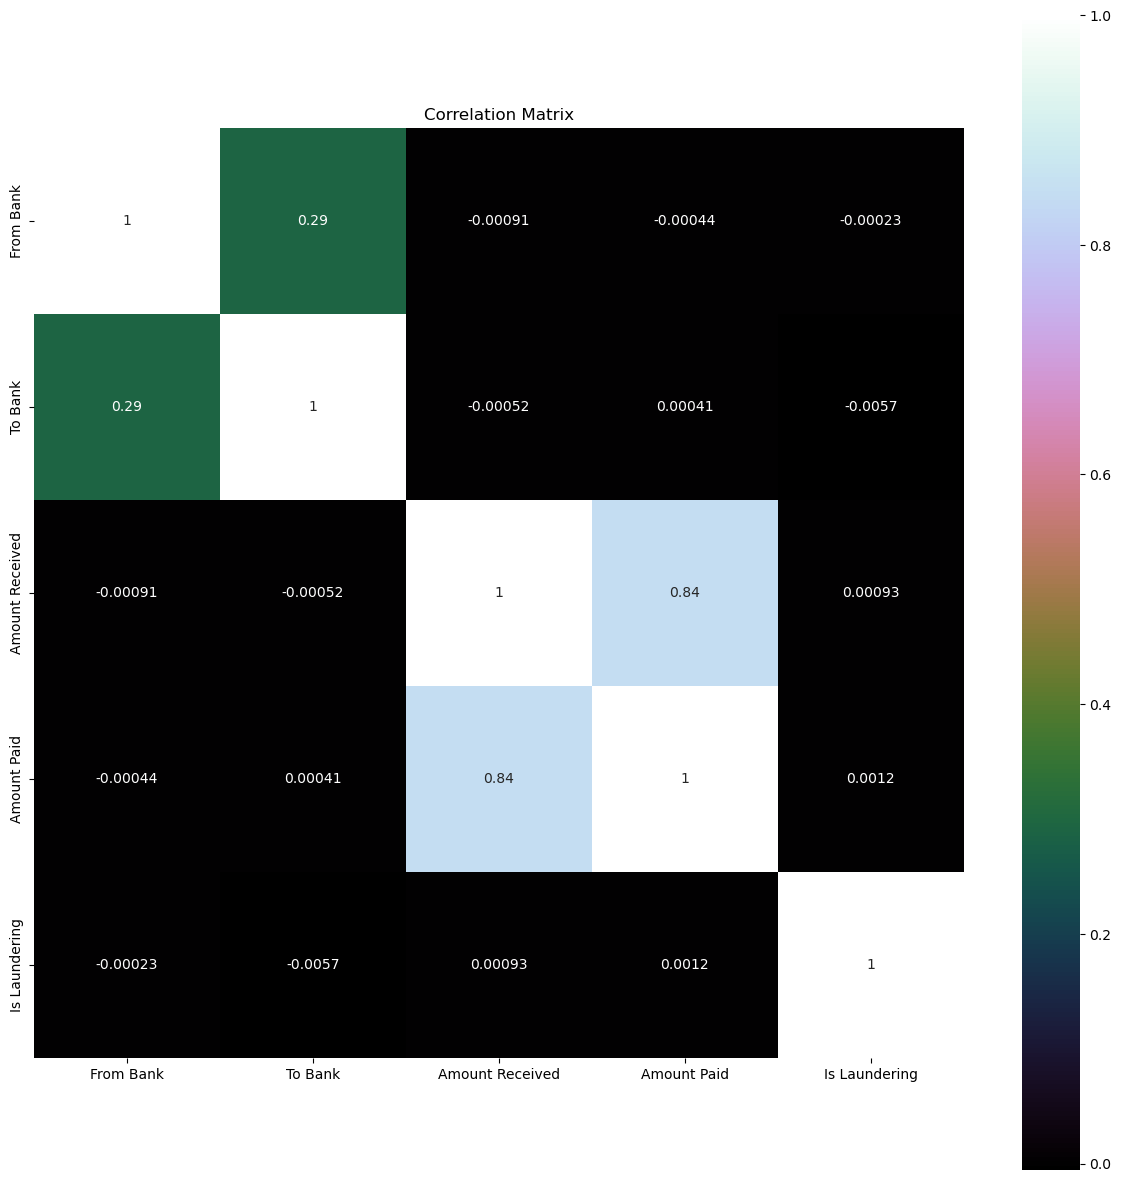

In [ ]:

''' correlation matrix to check multicolinearity between variables '''

correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### Is_laudering = 1 Analysis

In [59]:
# get rows where is_laudering is 1
df_laundering = df[df['is_laundering'] == 1]

# Get the count and percentage of each payment format
counts = df_laundering['payment_format'].value_counts().to_frame()
counts['percentage_of_transaction'] = counts['payment_format'] / len(df_laundering) * 100
print(len(df_laundering) / len(df) * 100)
print(counts)

0.09543934322373807
             payment_format  percentage_of_transaction
ACH                    3583                  85.799808
Cheque                  275                   6.585249
Credit Card             178                   4.262452
Cash                     93                   2.227011
Bitcoin                  47                   1.125479


In [55]:
# get rows where is_laudering is 0
df_isNotlaundering = df[df['is_laundering'] == 0]

# Get the count and percentage of each payment format
counts = df_isNotlaundering['payment_format'].value_counts().to_frame()
counts['percentage_of_transaction'] = counts['payment_format'] / len(df_isNotlaundering) * 100
print(counts)

              payment_format  percentage_of_transaction
Cheque               1577953                  36.097382
Credit Card          1125700                  25.751605
ACH                   498532                  11.404459
Reinvestment          481056                  11.004676
Cash                  415369                   9.502015
Wire                  146948                   3.361594
Bitcoin               125820                   2.878269


## Money Laudering Patterns Data Set

### Pre Processing

In [ ]:
# read the file
with open("data/HI-Small_Patterns.txt", "r") as f:
    lines = f.readlines()

patterns_data = []
current_laundering_id = 0
current_pattern_name = ""

# loop over the lines
for line in lines:
    line = line.strip()
    if not line:
        continue
    if line.startswith("BEGIN LAUNDERING ATTEMPT"):
        current_laundering_id += 1
        laundering_type = line.split(" - ")[1]
        current_pattern_name = laundering_type.split(":")[0].strip()
    elif line.startswith("END LAUNDERING ATTEMPT"):
        continue
    else:
        cols = line.split(",")
        cols = [col.strip() for col in cols]
        cols.append(laundering_type)
        cols.append(current_laundering_id)
        cols.append(current_pattern_name)
        patterns_data.append(cols)

# convert to dataframe
patterns = pd.DataFrame(patterns_data, columns=['timestamp', 'from_bank', 'from_account', 'to_bank', 'to_account', 'amount_received',
                                 'receiving_currency', 'amount_paid', 'payment_currency', 'payment_format', 'is_laundering', 'laundering_type', 'pattern_id', 'pattern_name'])

# convert columns to appropriate data types
patterns['amount_received'] = patterns['amount_received'].astype(float)
patterns['amount_paid'] = patterns['amount_paid'].astype(float)

In [ ]:
#patterns.to_csv("data/patterns_dataframe.csv", index=False)

In [35]:
patterns = pd.read_csv("data/patterns_dataframe.csv")

In [36]:
# display the first few rows of the DataFrame
patterns[20:30]

,timestamp,from_bank,from_account,to_bank,to_account,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering,laundering_type,pattern_id,pattern_name
20,2022/09/03 10:20,24856,8090E8EB0,71,804ABCE90,637140.60,Rupee,637140.60,Rupee,ACH,1,CYCLE: Max 10 hops,2,CYCLE
21,2022/09/03 12:08,71,804ABCE90,213737,805494C30,621578.18,Rupee,621578.18,Rupee,ACH,1,CYCLE: Max 10 hops,2,CYCLE
22,2022/09/03 13:24,213737,805494C30,14290,801B949C0,7222.58,Euro,7222.58,Euro,ACH,1,CYCLE: Max 10 hops,2,CYCLE
23,2022/09/04 03:24,14290,801B949C0,10057,803DE1580,892031.21,Yen,892031.21,Yen,ACH,1,CYCLE: Max 10 hops,2,CYCLE
24,2022/09/04 09:44,10057,803DE1580,28628,80ACEE280,11364.12,Australian Dollar,11364.12,Australian Dollar,ACH,1,CYCLE: Max 10 hops,2,CYCLE
25,2022/09/04 15:51,28628,80ACEE280,1467,8013C4030,7945.55,US Dollar,7945.55,US Dollar,ACH,1,CYCLE: Max 10 hops,2,CYCLE
26,2022/09/01 00:04,119,811C597B0,48309,811C599A0,34254.65,Saudi Riyal,34254.65,Saudi Riyal,ACH,1,GATHER-SCATTER: Max 3-degree Fan-In,3,GATHER-SCATTER
27,2022/09/01 19:27,150240,812D22980,48309,811C599A0,5971.98,Saudi Riyal,5971.98,Saudi Riyal,ACH,1,GATHER-SCATTER: Max 3-degree Fan-In,3,GATHER-SCATTER
28,2022/09/04 05:06,222,811B83280,48309,811C599A0,50445.58,Saudi Riyal,50445.58,Saudi Riyal,ACH,1,GATHER-SCATTER: Max 3-degree Fan-In,3,GATHER-SCATTER
29,2022/09/04 05:03,48309,811C599A0,48309,811C599A0,48649.42,Saudi Riyal,48649.42,Saudi Riyal,ACH,1,GATHER-SCATTER: Max 3-degree Fan-In,3,GATHER-SCATTER


In [37]:
patterns.columns

Index(['timestamp', 'from_bank', 'from_account', 'to_bank', 'to_account',
       'amount_received', 'receiving_currency', 'amount_paid',
       'payment_currency', 'payment_format', 'is_laundering',
       'laundering_type', 'pattern_id', 'pattern_name'],
      dtype='object')

### Payment Format Deep Dive

In [39]:
# Get the count and percentage of each payment format
counts = patterns['payment_format'].value_counts().to_frame()
counts['percentage_of_transaction'] = counts['payment_format'] / len(patterns) * 100
print(counts)

         payment_format  percentage_of_transaction
ACH                3208                  99.968838
Bitcoin               1                   0.031162


### Pattern Analysis

In [41]:
# count the number of unique patterns
pattern_count = patterns['pattern_name'].nunique()
print("Number of unique patterns:", pattern_count)

Number of unique patterns: 8


In [50]:
# count the number of unique patterns_id for each pattern_name and sort the values in descending order
pattern_id_count = patterns.groupby('pattern_name')['pattern_id'].nunique().sort_values(ascending=False)
print(pattern_id_count)

pattern_name
CYCLE             54
GATHER-SCATTER    51
BIPARTITE         49
FAN-OUT           48
SCATTER-GATHER    44
STACK             43
RANDOM            41
FAN-IN            40
Name: pattern_id, dtype: int64


In [52]:
# count the number of unique from_account for each pattern_name and sort the values in descending order
from_account_count = patterns.groupby('pattern_name')['from_account'].nunique().sort_values(ascending=False) 
print(from_account_count)

pattern_name
STACK             446
GATHER-SCATTER    380
SCATTER-GATHER    339
FAN-IN            307
CYCLE             271
BIPARTITE         250
RANDOM            181
FAN-OUT            43
Name: from_account, dtype: int64
